In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

After Importing what I need, Ive got to load my file in as a dataframe.  Then I want to see the basic info on it, how many columns, data types, rows, etc.
Then I want to check the quality of data in my not integer value columns, by printing out all of the unique observations found. This will tell me if there are variations in the input, such as the case or spacing, that need to be addressed before attempting to group data.

In [2]:
student_perf = pd.read_csv('..\data\StudentsPerformance.csv')
student_perf.info()
print(student_perf['gender'].unique())
print(student_perf['test preparation course'].unique())
print(student_perf['lunch'].unique())
print(student_perf['parental level of education'].unique())
print(student_perf['race/ethnicity'].unique())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
['female' 'male']
['none' 'completed']
['standard' 'free/reduced']
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
['group B' 'group C' 'group A' 'group D' 'group E']


Now, I want to check if there are any values out of range, in this case below zero or above 100.
I also want to see if there are any scores missing.

In [3]:
print(student_perf['math score'].min(), student_perf['math score'].max())
print(student_perf['reading score'].min(), student_perf['reading score'].max())
print(student_perf['writing score'].min(), student_perf['writing score'].max())
print(student_perf['math score'].isna().sum())
print(student_perf['reading score'].isna().sum())
print(student_perf['writing score'].isna().sum())

0 100
17 100
10 100
0
0
0


Next, I want to take the average value of the 3 test scores for each student #, and use it to create an overall test score column.  For now, I am not going to focus on the achievement by subject, just overall achievement.  
After making the new column, i just want to make sure the values are as expected.  I sorted the values to check for any outliers, and to get an idea of the data for students at both ends of the range.

In [4]:
student_perf['avg_test_score'] = (student_perf['math score'] + student_perf['reading score'] + student_perf['writing score']) / 3
print(student_perf['avg_test_score'].mean())
sorted_avg_score = student_perf['avg_test_score'].sort_values(ascending = False)
print(sorted_avg_score.tail())
sorted_avg_score.head()


67.77066666666664
76     26.000000
327    23.333333
596    23.000000
980    18.333333
59      9.000000
Name: avg_test_score, dtype: float64


962    100.000000
916    100.000000
458    100.000000
114     99.666667
179     99.000000
Name: avg_test_score, dtype: float64

Now, I believe my data is ready to be subsetted in to my different groupings based on each variable, allowing me to make the correct calculations needed in order to identify the strongest correlations.  I will start by dividing the students in to 2 groups based on the 2 options under the lunch variable, and comparing the average scores.  From there, I will move on to the other attributes.

In [5]:
free_reduced = student_perf[student_perf.lunch == 'free/reduced']
not_free = student_perf[student_perf.lunch != 'free/reduced']
print(free_reduced['avg_test_score'].mean())
print(not_free['avg_test_score'].mean())
print(free_reduced['avg_test_score'].min())
print(not_free['avg_test_score'].min())
print(free_reduced['avg_test_score'].max())


62.199061032863845
70.83720930232563
9.0
26.0
97.66666666666667


# EXPLORATORY DATA ANALYSIS

The first thing I want to take another look at for data analysis is the 3 test scores, and how they correlate with one another.  The strength of correlation may help decide if it is necessary to analyze performance for each test individually, or to simply work with the overall averages.  There also may be a specifically strong correlation, such as between reading and writing, that may allow me to combine their scores in to 1.

In [6]:
#creating new database of just the 3 test scores
test_grades = student_perf[['math score','reading score','writing score']]
tg_corr = test_grades.corr()
print(tg_corr)

               math score  reading score  writing score
math score       1.000000       0.817580       0.802642
reading score    0.817580       1.000000       0.954598
writing score    0.802642       0.954598       1.000000


There is a fairly strong correlation between all scores, but there is an extremely high correlation of over .95 between reading and writing scores.  Because of this, I will combine those 2 scores for plotting purposes in to a reading/writing score column.

In [7]:
student_perf['r/w score'] = (student_perf['reading score'] + student_perf['writing score'])/2

The first thing I want to look at is the breakdown of scores between for my 4 most important features; whether a student has taken the test prep, whether a student qualifies for free/reduced lunch(families in the lower income brackets qualify for free/reduced lunch), the parent of the student's educational level, as well as which race/ethnicity category the student falls in to.  I also have a classification on gender, however at this point, I am more interested in the determinant characteristics of the 4 features listed above.

In [8]:
#Starting with whether a student qualifies for free/reduced lunch, first I want to see how large a sample I have for each 
#category, and then look at the means for each subset:

lunch_scores = student_perf[['lunch', 'math score', 'r/w score']]
not_free = student_perf[student_perf['lunch'] == 'standard']
free_reduced = student_perf[student_perf['lunch'] == 'free/reduced']
print('The # of students on standard lunch:', len(not_free))
print('The # of students on free/reduced lunch:', len(free_reduced))


The # of students on standard lunch: 645
The # of students on free/reduced lunch: 355


In [9]:
print('The mean math score of those on standard lunch is:', round(np.mean(not_free['math score']), 2))
print('The mean math score of those on free/reduced lunch is:', round(np.mean(free_reduced['math score']), 2))
print('The mean reading/writing score of those on standard lunch is:', round(np.mean(not_free['r/w score']), 2))
print('The mean reading/writing score of those on free/reduced lunch is:', round(np.mean(free_reduced['r/w score']), 2))

The mean math score of those on standard lunch is: 70.03
The mean math score of those on free/reduced lunch is: 58.92
The mean reading/writing score of those on standard lunch is: 71.24
The mean reading/writing score of those on free/reduced lunch is: 63.84


There's an over 11 point difference in the mean of the math scores, and around a 7.5 difference in the mean of the reading/writing scores between standard and free/reduced lunch students. The next step is to take a closer look at the overall range and distribution of the scores within these 2 categories.

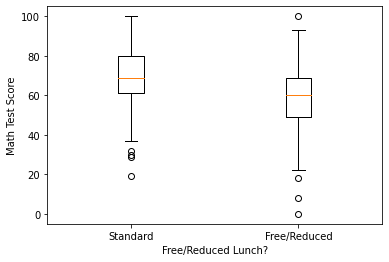

In [10]:
_ = plt.boxplot([not_free['math score'], free_reduced['math score']])
_ = plt.xlabel('Free/Reduced Lunch?')
_ = plt.ylabel('Math Test Score')
_ = plt.xticks([1, 2], ['Standard', 'Free/Reduced']) 
plt.show()


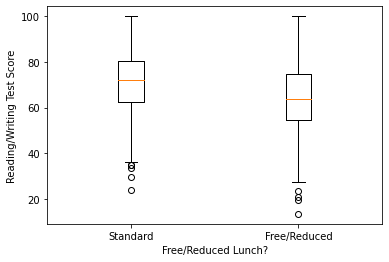

In [11]:
_ = plt.boxplot([not_free['r/w score'], free_reduced['r/w score']])
_ = plt.xlabel('Free/Reduced Lunch?')
_ = plt.ylabel('Reading/Writing Test Score')
_ = plt.xticks([1, 2], ['Standard', 'Free/Reduced'])
plt.show()

There's a clear difference between the performance of those who qualify for free/reduced lunch and those who don't, which is unsurprising.  While free/reduced lunch seems to be a variable that drives test scores, qualifying for free/reduced lunch is often a variable driven by another variable, parental education level.  Next, I want to see just how closely correlated parental education level is to whether one qualifies for free/reduced lunch.
I want to do this by looking at each of the subsets for parental education level to determine how many within that subset also qualify for free/reduced lunch. 

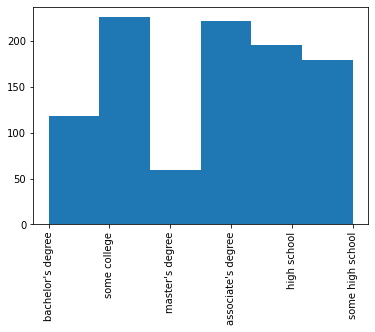

In [12]:
#Subsetting the 'parental level of education'
master = student_perf[student_perf['parental level of education']=="master's degree"]
bachelor = student_perf[student_perf['parental level of education']=="bachelor's degree"]
assoc = student_perf[student_perf['parental level of education']=="associate's degree"]
some_coll = student_perf[student_perf['parental level of education']=='some college']
high_only = student_perf[student_perf['parental level of education']=='high school']
some_high = student_perf[student_perf['parental level of education']=='some high school']

plt.hist(student_perf['parental level of education'], bins=6)
plt.xticks(rotation=90)
plt.show()

#I want to order these by ascending level of education, but have not figured out how to do that yet.

The Distribution of the parental level of education column shows over 80% of our student's fall in to the 4 categories within associate's degree and below. 
What I am most interested in is how much the free/reduced lunch category is determined by parental education level, to see if free/reduced lunch is simply a product of education level in this dataset.

In [13]:
print((np.sum(master.lunch=='standard'))/(np.sum(len(master))))
print((np.sum(some_high.lunch=='standard'))/(np.sum(len(some_high))))

0.5932203389830508
0.659217877094972


Just by looking at the highest and lowest education levels, there appears to be no relationship between parental level of education and the family income level(which is used to determine free/reduced lunch) in this dataset.
That is counter to what the vast majority of previous research in the field shows, but for the sake of the project, I will stick to the information in this dataset and assume there is no correlation here.  Knowing that these are completely independent variables in the dataset, I'll go on to look at the test scores by education level.

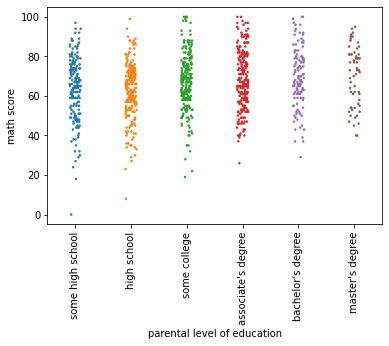

In [14]:
ed_list = ['some high school', 'high school', 'some college', "associate's degree", "bachelor's degree", "master's degree"]
sns.stripplot(x='parental level of education', y='math score', data=student_perf, marker='.', order=ed_list)
plt.xticks(rotation=90)
plt.show()

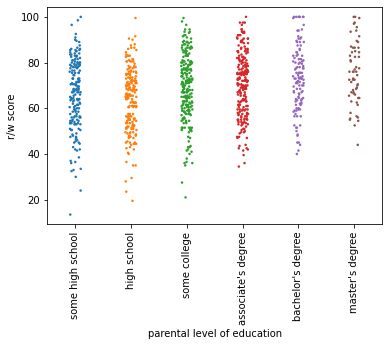

In [15]:
sns.stripplot(x='parental level of education', y='r/w score', data=student_perf, marker='.', order=ed_list)
plt.xticks(rotation=90)
plt.show()

There does appear to be a slight, but clear movement towards higher scores among the higher education levels, especially in the reading/writing scores.  It seems that high scores in both areas can come from any category of parental education level, but with lower levels of parental level of education, there's a wider range of scores and a number of scores well below the minimums of other groups in the higher education levels. 

In [16]:
print(round(np.mean(some_high['r/w score']), 2))
print(round(np.mean(high_only['r/w score']), 2))
print(round(np.mean(some_coll['r/w score']), 2))
print(round(np.mean(assoc['r/w score']), 2))
print(round(np.mean(bachelor['r/w score']), 2))
print(round(np.mean(master['r/w score']), 2))

65.91
63.58
69.15
70.41
73.19
75.53


In [17]:
print(round(np.mean(some_high['math score']), 2))
print(round(np.mean(high_only['math score']), 2))
print(round(np.mean(some_coll['math score']), 2))
print(round(np.mean(assoc['math score']), 2))
print(round(np.mean(bachelor['math score']), 2))
print(round(np.mean(master['math score']), 2))

63.5
62.14
67.13
67.88
69.39
69.75


Outside of the lowest 2 levels, there does appear to be a gradual increase in the mean as the parental education level, 
but there are larger increase in both sets from the 2nd to the 3rd levels, and from the 4th to the 5th levels. It may be 
worth in combining some of our levels, creating 3 total categories; high school and below, some college/associates, and 
bachelor's/master's for further analysis.  However, either way, we can see a positive correlation here between higher parental levels of education and higher scores.  This time, Reading and writing scores show the larger disparities.

The next category to look at is whether a student took completed the test preparation course.

In [18]:
prepped = student_perf[student_perf['test preparation course']=='completed']
no_prep = student_perf[student_perf['test preparation course']!='completed']

print('There are', len(prepped), 'students that took the test prep.', len(no_prep), 'did not.')
print('The mean math score for students who took the prep course:', np.mean(prepped['math score']))
print('The mean math score for students who did NOT take the prep course:', np.mean(no_prep['math score']))

print('The mean reading/writing score for students who took the prep course:', np.mean(prepped['r/w score']))
print('The mean reading/writing score for students who did NOT take the prep course:', np.mean(no_prep['r/w score']))

There are 358 students that took the test prep. 642 did not.
The mean math score for students who took the prep course: 69.69553072625699
The mean math score for students who did NOT take the prep course: 64.0778816199377
The mean reading/writing score for students who took the prep course: 74.15642458100558
The mean reading/writing score for students who did NOT take the prep course: 65.51947040498442


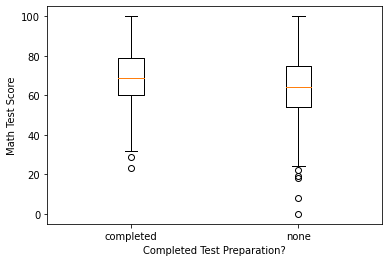

In [19]:
_ = plt.boxplot([prepped['math score'], no_prep['math score']])
_ = plt.xlabel('Completed Test Preparation?')
_ = plt.ylabel('Math Test Score')
_ = plt.xticks([1, 2], ['completed', 'none'])
plt.show()

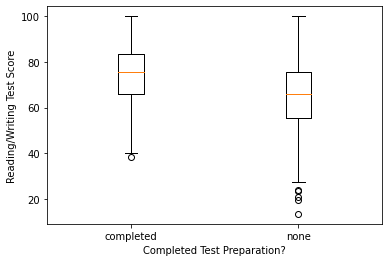

In [20]:
_ = plt.boxplot([prepped['r/w score'], no_prep['r/w score']])
_ = plt.xlabel('Completed Test Preparation?')
_ = plt.ylabel('Reading/Writing Test Score')
_ = plt.xticks([1, 2], ['completed', 'none'])
plt.show()

It's clear that test prep helped, although it wasnt a guarantee of test success. Those who took test_prep scored 5.5 points on average higher on the math test, and 8.5 points on average higher for the reading and writing tests.
Like with the free and reduced lunch category, however, whether a student took the test prep course may be a product of another category. 

In [21]:
print((np.sum(prepped['lunch']=='standard'))/len(prepped))
print((np.sum(student_perf['lunch']=='standard'))/len(student_perf))

0.6340782122905028
0.645


In [22]:
print((np.sum(free_reduced['test preparation course']=='completed'))/len(free_reduced))
print((np.sum(not_free['test preparation course']=='completed'))/len(not_free))

0.36901408450704226
0.351937984496124


The Percentages both ways appear to be extremely similar.  It doesnt appear students were more likely to take the test prep based on whether or not they receive free or reduced lunch, which is determined by family income.

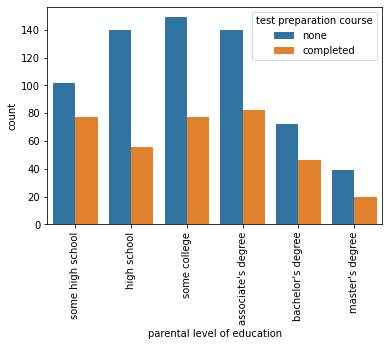

In [23]:
sns.countplot(x=student_perf['parental level of education'], hue=student_perf['test preparation course'], order=ed_list)
plt.xticks(rotation=90)
plt.show()

There is some slight variation, but among all parental education levels, more students did NOT complete the test prep course than did.  Of all the education levels, those on the lowest level (some high school) were actually more likely in our sample to take the prep course than any other group.  This may explain why the average test scores were actually higher among students with parents that had some high school than for students with parents that finished high school, but went no further.

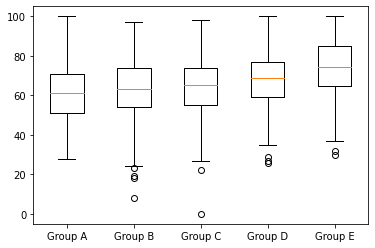

In [24]:
group_A = student_perf[student_perf['race/ethnicity']=='group A']
group_B = student_perf[student_perf['race/ethnicity']=='group B']
group_C = student_perf[student_perf['race/ethnicity']=='group C']
group_D = student_perf[student_perf['race/ethnicity']=='group D']
group_E = student_perf[student_perf['race/ethnicity']=='group E']

_ = plt.boxplot([group_A['math score'], group_B['math score'], group_C['math score'], group_D['math score'], 
                 group_E['math score']])
_ = plt.xticks([1, 2, 3, 4, 5], ['Group A', 'Group B', 'Group C', 'Group D', 'Group E'])
plt.show()

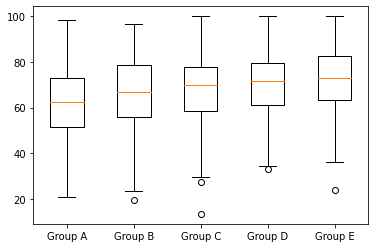

In [25]:
_ = plt.boxplot([group_A['r/w score'], group_B['r/w score'], group_C['r/w score'], group_D['r/w score'], group_E['r/w score']])
_ = plt.xticks([1, 2, 3, 4, 5], ['Group A', 'Group B', 'Group C', 'Group D', 'Group E'])
plt.show()

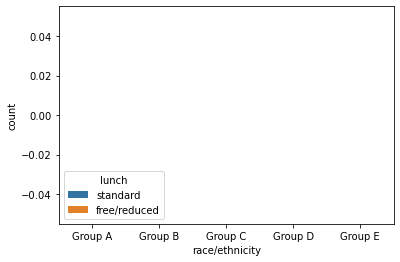

In [26]:
sns.countplot(x=student_perf['race/ethnicity'], hue=student_perf['lunch'], order=['Group A', 'Group B', 'Group C', 'Group D', 'Group E'])
plt.show()

# Not sure why this isn't showing?

# Conclusion - EDA

It seems that all 4 of our features each have an effect on scores for both math and reading/writing. The strongest correlation in scores of our first 3 categories appears to be whether a student qualifies for free and reduced lunch. According to the data, those students who do qualify, and thus are on or below the poverty line, are likely to score almost a whole letter grade lower in math, and more than one full letter grade lower in reading/writing.
At the same time, there was also a similar significance in the level of parental education, with students of parents with higher education levels scoring higher than their counterparts.  This however, did not seem as strong as the free and reduced lunch qualifier. I also found that the test preparation course bumped up scores for all categories, particularly when it came to the reading and writing tests.  
Lastly, there was also a gradual increase in mean performance moving through the racial categories, starting on A and ending on E, with Group E outperforming Group A by a full letter grade and a half. This proved the largest disparity between groups in any of the 4 categories analyzed.

# Pre-processing and Training Data Development

Next steps include getting dummy variables of our categorical data, Scaling the data, and creating our training and testing splits for modelling.

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [28]:
dum_lunch = pd.get_dummies(student_perf['lunch'], drop_first=True)
dum_lunch.head()

,standard
0,1
1,1
2,1
3,0
4,1


In [29]:
dum_prep = pd.get_dummies(student_perf['test preparation course'], drop_first=True)
dum_prep.head()

,none
0,1
1,0
2,1
3,1
4,1


In [30]:
dum_parent = pd.get_dummies(student_perf['parental level of education'], drop_first=True)
dum_parent.head()

,bachelor's degree,high school,master's degree,some college,some high school
0,1,0,0,0,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,0,0,0
4,0,0,0,1,0


In [31]:
dum_ethnic = pd.get_dummies(student_perf['race/ethnicity'], drop_first=True)
dum_ethnic.head()

,group B,group C,group D,group E
0,1,0,0,0
1,0,1,0,0
2,1,0,0,0
3,0,0,0,0
4,0,1,0,0


In [32]:
dummies = pd.concat([dum_lunch, dum_prep, dum_parent, dum_ethnic], axis = 1)
dummies = dummies.rename({'none':'no prep'}, axis = 1)
dummies.head()

,standard,no prep,bachelor's degree,high school,master's degree,some college,some high school,group B,group C,group D,group E
0,1,1,1,0,0,0,0,1,0,0,0
1,1,0,0,0,0,1,0,0,1,0,0
2,1,1,0,0,1,0,0,1,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,1,0,0,1,0,0


In [33]:
#All of this will have to be repeated with the reading/writing score, but starting with math scores...

X = dummies
y = student_perf['math score']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)